<a href="https://colab.research.google.com/github/avivel97/forked/blob/main/UCR_Time_Series_Classification_Archive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Скачиваем файл
!wget https://www.cs.ucr.edu/~eamonn/time_series_data/UCR_TS_Archive_2015.zip

--2024-11-06 20:21:16--  https://www.cs.ucr.edu/~eamonn/time_series_data/UCR_TS_Archive_2015.zip
Resolving www.cs.ucr.edu (www.cs.ucr.edu)... 169.235.30.15
Connecting to www.cs.ucr.edu (www.cs.ucr.edu)|169.235.30.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126756985 (121M) [application/zip]
Saving to: ‘UCR_TS_Archive_2015.zip’

UCR_TS_Archive_2015 100%[===================>] 120.88M  38.0MB/s    in 3.6s    

2024-11-06 20:21:20 (33.2 MB/s) - ‘UCR_TS_Archive_2015.zip’ saved [126756985/126756985]



In [ ]:
from zipfile import ZipFile
import threading

# Создаем функцию для разархивации архива с паролем
def uncompress(path, password):
  with ZipFile(path, "r") as zip:
    zip.extractall(path="uncompressed", pwd=password.encode("utf-8"))

file_name = "UCR_TS_Archive_2015.zip"

# Запускаем функцию в отдельный поток, чтобы она работала в фоне и не мешала нам, т.к. данных очень много
threading.Thread(target=uncompress, args=(file_name, 'attempttoclassify')).start()

In [ ]:
import pandas as pd

_50words_df = pd.read_csv('uncompressed/UCR_TS_Archive_2015/50words/50words_TRAIN', header=None)

In [ ]:
# Даем первому столбцу название "class", потому что это класс временного ряда, это описано в доке:
# https://www.cs.ucr.edu/~eamonn/time_series_data/UCR%20Time%20Series%20Classification%20Archive.pdf
_50words_df.columns = ['class'] + [str(x) for x in _50words_df.columns[1:]]

In [ ]:
_50words_df.head(5)

,class,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,9,-0.79042,-0.76517,-0.73354,-0.69963,-0.667740,-0.638630,-0.611810,-0.58728,-0.56430,...,-0.592320,-0.62175,-0.65471,-0.69032,-0.72764,-0.76425,-0.79486,-0.81473,-0.82271,-0.82133
1,18,-0.76406,-0.74445,-0.74379,-0.72095,-0.717990,-0.702820,-0.691820,-0.68080,-0.67143,...,-0.528000,-0.45393,-0.36532,-0.31180,-0.33682,-0.42908,-0.53464,-0.62984,-0.71135,-0.77447
2,1,-0.81704,-0.73310,-0.62782,-0.49572,-0.334890,-0.143280,0.077817,0.32273,0.58623,...,-0.905360,-0.90961,-0.91489,-0.92182,-0.93115,-0.94213,-0.95220,-0.95905,-0.96174,-0.96086
3,5,-1.10380,-1.07120,-1.02490,-0.96729,-0.905160,-0.844320,-0.783510,-0.72085,-0.65855,...,-0.953410,-0.97466,-1.00060,-1.03150,-1.06480,-1.09560,-1.11900,-1.13240,-1.13590,-1.13270
4,4,-0.43600,-0.31636,-0.21170,-0.11485,-0.019499,0.070713,0.143290,0.19343,0.22683,...,-0.049013,-0.16300,-0.26418,-0.34839,-0.40883,-0.44638,-0.47558,-0.51647,-0.57994,-0.65041


<ipython-input-18-a7e0f4ea3e5b>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(row[1:], label=f'Класс {row[0]}');


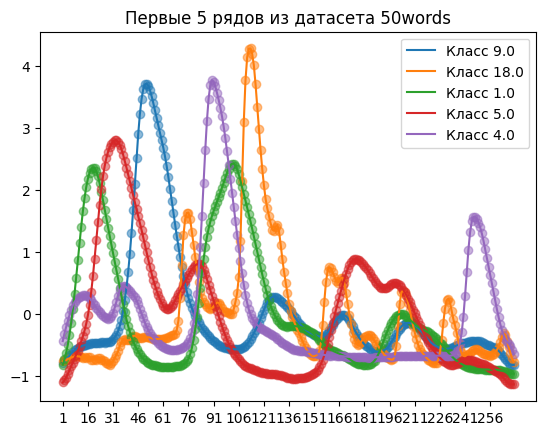

In [ ]:
import matplotlib.pyplot as plt

# Для построения графиков генерируем последовательность точек от 1 до длины временного ряда
x = range(len(_50words_df.iloc[0, 1:]))

for _, row in _50words_df.head(5).iterrows():
  # Строим линейный график + скаттер плот с полупрозрачностью
  plt.plot(row[1:], label=f'Класс {row[0]}');
  plt.scatter(x, row[1:], alpha=0.5);

plt.legend();
plt.title('Первые 5 рядов из датасета 50words');

# Чтобы не мельчить подписи на ОХ, получаем объект axis с помошью gca и выводим только каждый 15-й индекс
ax = plt.gca();
ax.set_xticks(x[::15]);

plt.show();